In [27]:
import numpy as np
import pickle
import matplotlib.pyplot as plt
import os

plt.rcParams.update({
    "text.usetex": True,
    "font.family": "sans-serif"
})

In [10]:
def method2plotstr(method):
    if method == "p":
        return r"p = 2"
    parts = method.split("-")
    if len(parts) > 1:
        p = int(parts[-1])
        return fr"p = {p}"
    return method

In [28]:
def plot_results(dataset, pkl_fname, to_plot=['passive', 'greedy', 'p', 'p-1', 'p-5'], save=False, savedir="./figures/"):
    with open(pkl_fname, "rb") as f:
        data = pickle.load(f)
        
    xmax = 16
    xtick_step = 2
    fig, ax = plt.subplots(figsize=(8,3))
    for method in to_plot:
        if method not in data:
            print(f"Could not find {method} in dictionary")
        d = data[method]
        vals = np.array([list(ev[:xmax]) for ev in d['energy_values']])
        mean_vals = vals.mean(axis=0)
        std_vals = vals.std(axis=0)
        l = ax.semilogy(range(1, xmax+1), mean_vals, linewidth=2.1, label=fr"{method2plotstr(method)}")
        #ax.fill_between(range(1, xmax+1), mean_vals - std_vals, mean_vals + std_vals, alpha=0.2, color=l[0].get_color())
    ax.legend()
    xticks = [i for i in range(xmax+1) if i % xtick_step == 0]
    ax.set_xticks(xticks)
    ax.set_ylabel(r'$\|X - WH\|_F^2 / \|X\|_F^2$', fontsize=12)
    ax.set_xlabel(r'$k$', fontsize=12)
    if save:
        if not os.path.exists(savedir):
            os.makedirs(savedir)
        plt.savefig(os.path.join(savedir, f"{dataset}_relerr.png"), format='png', dpi=250, bbox_inches='tight')
    plt.show()

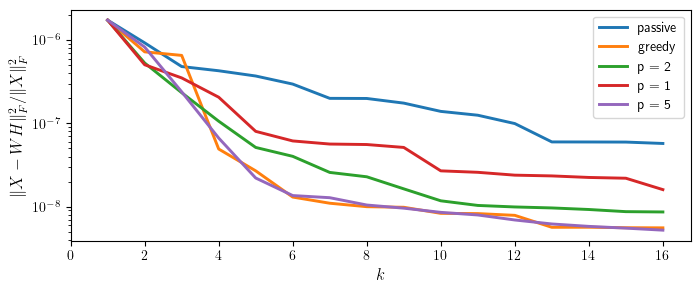

In [29]:
plot_results("pavia", "./results/pavia_cvx_k20_ns5_nla100_fpgm_all.pkl", save=True)

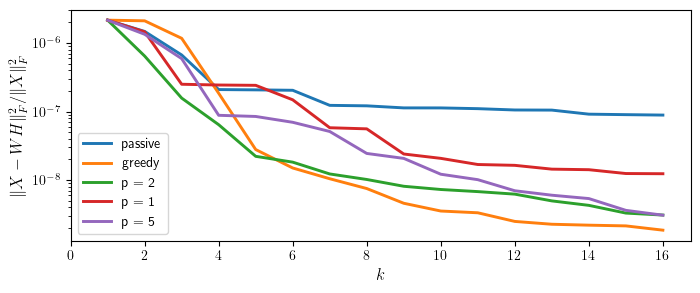

In [30]:
plot_results("salinas", "./results/salinas_cvx_k20_ns5_nla100_fpgm_all.pkl", save=True)

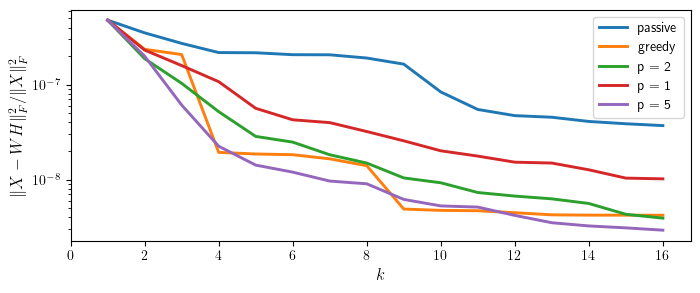

In [31]:
plot_results("urban", "./results/urban_cvx_k20_ns5_nla100_fpgm_all.pkl", save=True)

In [439]:
with open("./results/snp_cvx_k20_ns5_nla100_fpgm_all.pkl", "rb") as f:
    snp_data = pickle.load(f)

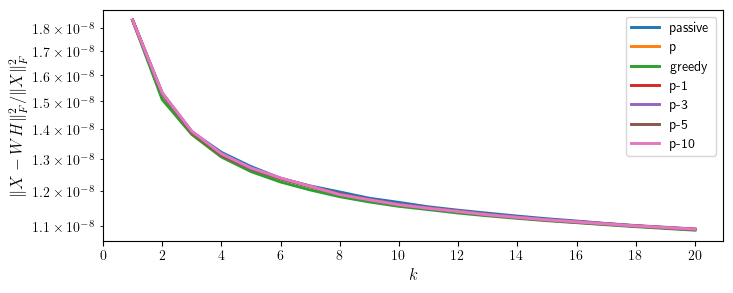

In [440]:
xmax = 20
xtick_step = 2
fig, ax = plt.subplots(figsize=(8,3))
for method, d in snp_data.items():
    vals = np.array([list(ev[:xmax]) for ev in d['energy_values']])
    mean_vals = vals.mean(axis=0)
    std_vals = vals.std(axis=0)
    l = ax.semilogy(range(1, xmax+1), mean_vals, linewidth=2.1, label=fr"{method}")
    #ax.fill_between(range(1, xmax+1), mean_vals - std_vals, mean_vals + std_vals, alpha=0.2, color=l[0].get_color())
ax.legend()
xticks = [i for i in range(xmax+1) if i % xtick_step == 0]
ax.set_xticks(xticks)
ax.set_ylabel(r'$\|X - WH\|_F^2 / \|X\|_F^2$', fontsize=12)
ax.set_xlabel(r'$k$', fontsize=12)

plt.savefig("snp_relerr.png", format='png', dpi=250, bbox_inches='tight')
plt.show()

In [425]:
filename = "/workspace/ksmiller/code/nmfbook/data sets/tdt2_top30.mat"
top30 = loadmat(filename)
print(list(top30.keys()))

['__header__', '__version__', '__globals__', 'X', 'Y', 'ts', 'words', 'start', 'data']


In [426]:
print(top30['X'].shape)
print(top30['Y'].shape)

(9394, 19528)
(9394, 1)


In [427]:
print(top30['ts'].shape)

(9394, 1)


In [428]:
top30['Y'][:5], top30['ts'][:5]


(array([[ 1],
        [15],
        [ 7],
        [ 1],
        [12]], dtype=uint8),
 array([[1],
        [1],
        [1],
        [1],
        [1]], dtype=uint8))

In [430]:
np.unique(top30['Y']).size, np.unique(top30['ts']).size

(30, 178)

In [434]:
np.unique(top30['data'].shape)

array([   1, 9394])

In [435]:
np.unique(top30['Y'])

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30], dtype=uint8)

In [436]:
np.savez("./data/tdt2_top30.npz", X=top30['X'].T)

In [437]:
top30['X'][:5,:5]

<5x5 sparse matrix of type '<class 'numpy.float64'>'
	with 0 stored elements in Compressed Sparse Column format>